In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\dsadm\appdata\local\programs\python\python312\lib\site-packages (3.9.2)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
dados = pd.DataFrame({     #Criando o dataframe
    'Símbolo':['AAPL','Google','MSFT',
               'AMZN','TSLA','FB'],
    'Preço':[150.12,2700.45,300.89,3200.10,700.78,
             350.40],
    'Volume de negociação':[3000000,1000000,2500000,
                            1200000,5000000,900000],
    'Capitalização de mercado':[2000000000000,18000000000000,
                                22000000000000,1700000000000,
                                75000000000000,9000000000000]
})

Text(0.5, 1.0, 'Analisando o preço das ações')

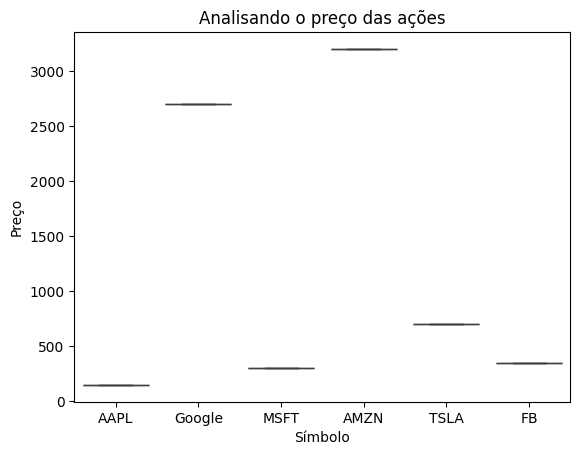

In [8]:
# Plotando o boxplot
sns.boxplot(x= dados['Símbolo'],y=dados['Preço'])
plt.title('Analisando o preço das ações')

In [9]:

dados.describe() # descreve os dados de forma estatistica

,Preço,Volume de negociação,Capitalização de mercado
count,6.000000,6.000000e+00,6.000000e+00
mean,1233.790000,2.266667e+06,2.128333e+13
std,1351.043094,1.592064e+06,2.757901e+13
min,150.120000,9.000000e+05,1.700000e+12
25%,313.267500,1.050000e+06,3.750000e+12
50%,525.590000,1.850000e+06,1.350000e+13
75%,2200.532500,2.875000e+06,2.100000e+13
max,3200.100000,5.000000e+06,7.500000e+13


In [10]:
dados.info() # Exibe as informações da base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Símbolo                   6 non-null      object 
 1   Preço                     6 non-null      float64
 2   Volume de negociação      6 non-null      int64  
 3   Capitalização de mercado  6 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 324.0+ bytes


In [11]:
# transforma a coluna de simbolos em true ou falso
dados_ativos = pd.get_dummies(dados,columns=['Símbolo']) 

In [12]:

dados_ativos

,Preço,Volume de negociação,Capitalização de mercado,Símbolo_AAPL,Símbolo_AMZN,Símbolo_FB,Símbolo_Google,Símbolo_MSFT,Símbolo_TSLA
0,150.12,3000000,2000000000000,True,False,False,False,False,False
1,2700.45,1000000,18000000000000,False,False,False,True,False,False
2,300.89,2500000,22000000000000,False,False,False,False,True,False
3,3200.10,1200000,1700000000000,False,True,False,False,False,False
4,700.78,5000000,75000000000000,False,False,False,False,False,True
5,350.40,900000,9000000000000,False,False,True,False,False,False


In [13]:

# aplicando o Kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(dados_ativos)

KMeans(n_clusters=6)

In [14]:
sse = kmeans.inertia_
print('SSE',sse)

SSE 0.0


In [15]:

# Visualizando o resultado dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Preço das ações')

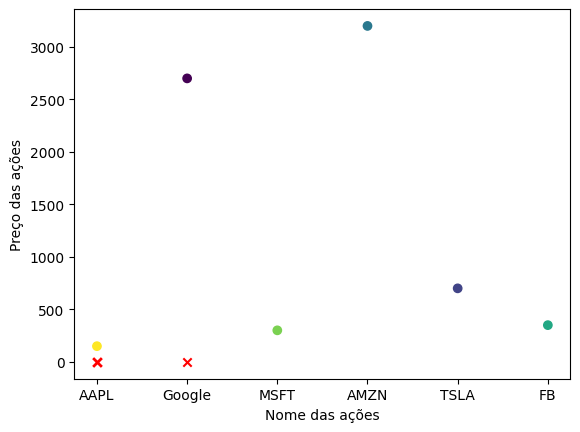

In [16]:

plt.scatter(dados['Símbolo'],dados['Preço'],c =labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Nome das ações')
plt.ylabel('Preço das ações')

In [17]:

# Analisando os outros grupos restantes
dados_ativos['Grupo'] = labels
grouped_data = dados_ativos.groupby('Grupo').mean()
print(grouped_data)

         Preço  Volume de negociação  Capitalização de mercado  Símbolo_AAPL  \
Grupo                                                                          
0      2700.45             1000000.0              1.800000e+13           0.0   
1       700.78             5000000.0              7.500000e+13           0.0   
2      3200.10             1200000.0              1.700000e+12           0.0   
3       350.40              900000.0              9.000000e+12           0.0   
4       300.89             2500000.0              2.200000e+13           0.0   
5       150.12             3000000.0              2.000000e+12           1.0   

       Símbolo_AMZN  Símbolo_FB  Símbolo_Google  Símbolo_MSFT  Símbolo_TSLA  
Grupo                                                                        
0               0.0         0.0             1.0           0.0           0.0  
1               0.0         0.0             0.0           0.0           1.0  
2               1.0         0.0             0.0